In [56]:
import numpy as np, pandas as pd, sklearn, matplotlib.pyplot as plt, sklearn.metrics

In [57]:
rev = pd.read_csv('movie_review_train.csv')
rev.head()

,class,text
0,Pos,a common complaint amongst film critics is ...
1,Pos,whew this film oozes energy the kind of b...
2,Pos,steven spielberg s amistad which is bas...
3,Pos,he has spent his entire life in an awful litt...
4,Pos,being that it is a foreign language film with...


In [58]:
rev_test = pd.read_csv("movie_review_test.csv")
rev_test.head()

,class,text
0,Pos,films adapted from comic books have had plent...
1,Pos,every now and then a movie comes along from a...
2,Pos,you ve got mail works alot better than it des...
3,Pos,jaws is a rare film that grabs your atte...
4,Pos,moviemaking is a lot like being the general m...


In [59]:
rev['class'].value_counts(normalize=True)

Pos    0.5
Neg    0.5
Name: class, dtype: float64

In [60]:
rev.size

3200

In [61]:
rev['label'] = rev['class'].map({"Pos":1, "Neg":0})
rev = rev.drop(["class"], axis=1)
rev.head()

,text,label
0,a common complaint amongst film critics is ...,1
1,whew this film oozes energy the kind of b...,1
2,steven spielberg s amistad which is bas...,1
3,he has spent his entire life in an awful litt...,1
4,being that it is a foreign language film with...,1


In [62]:
rev_test['label'] = rev_test['class'].map({"Pos":1, "Neg":0})
rev_test = rev_test.drop(["class"], axis=1)
rev_test.head()

,text,label
0,films adapted from comic books have had plent...,1
1,every now and then a movie comes along from a...,1
2,you ve got mail works alot better than it des...,1
3,jaws is a rare film that grabs your atte...,1
4,moviemaking is a lot like being the general m...,1


In [63]:
X_train = rev.text
y_train = rev.label

In [64]:
X_test = rev_test.text
y_test = rev_test.label

In [65]:
print(len(X_train))
print(len(y_train))

1600
1600


In [66]:
# we already have different testing data so not doing train test split

from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(stop_words='english')

In [67]:
vec.fit(X_train)

CountVectorizer(stop_words='english')

In [68]:
print(len(vec.get_feature_names_out()))

35858


#### Not going to use those (rare) words which have appeared only in 3% of the documents, or say those (extremely common ones) which have appeared in 80% of the documents.

In [69]:
vec = CountVectorizer(stop_words='english', min_df=0.03,max_df=0.8)
vec.fit(X_train)


CountVectorizer(max_df=0.8, min_df=0.03, stop_words='english')

In [70]:
print(len(vec.get_feature_names_out()))

1643


In [71]:
X_transform = vec.transform(X_train)

In [72]:
X_transform

<1600x1643 sparse matrix of type '<class 'numpy.int64'>'
	with 217396 stored elements in Compressed Sparse Row format>

In [73]:
print(X_transform.size)

217396


In [74]:
X_test_transform = vec.transform(X_test)

In [75]:
X_test_transform.size

51663

In [76]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()

In [79]:
bnb.fit(X_transform, y_train)

BernoulliNB()

In [80]:
y_pred_class= bnb.predict(X_test_transform)
y_pred_prob = bnb.predict_proba(X_test_transform)

In [81]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.79

In [82]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[177,  23],
       [ 61, 139]], dtype=int64)

In [83]:
from sklearn.metrics import roc_curve , auc
fpr,tpr,threshold = roc_curve(y_test, y_pred_class)

In [89]:
threshold

array([2, 1, 0], dtype=int64)

In [84]:
auc(fpr,tpr)

0.7899999999999999

(0.0, 1.05)

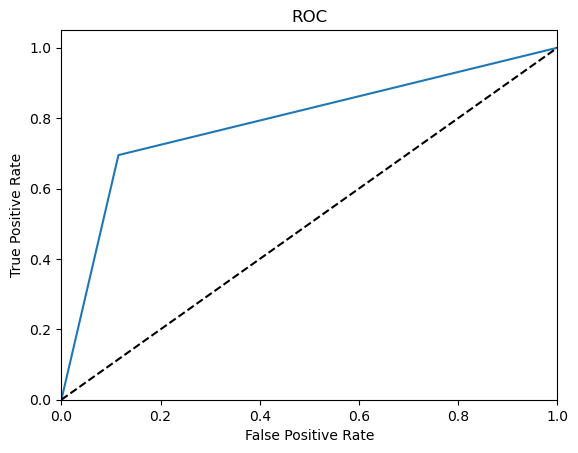

In [88]:
%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])


In [90]:
metrics.accuracy_score(y_test,y_pred_class)

0.79